In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Compile the hilbert curve version

In [45]:
%%bash
module load daint-gpu
module switch PrgEnv-gnu PrgEnv-cray
module load perftools-lite

make clean
make VERSION=hilbert

rm -f *.out weak.txt caching.txt caching2.txt out.txt 
rm -f -rf *~ *.o *.mod *.MOD *.i core.* *.out *.lst *.x *.x+orig *.x+[0-9]* *.dat *.report report_*.txt out.txt
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -h omp -c m_utils.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -h omp -c stencil2d-hilbert.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -h omp m_utils.o stencil2d-hilbert.o -o stencil2d-hilbert.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-hilbert.x' (lite-samples) ...OK


cp stencil2d-hilbert.x stencil2d.x


In [50]:
#################
# set grid size
################
size = 16
!srun -n 1 ./stencil2d-hilbert.x+orig --nx {size} --ny {size} --nz 1 --num_iter 1

# ranks nx ny nz num_iter time
data = np.array( [ \
[    1,   16,   16,    1,       1,  0.5245209E-05], \
] )


In [51]:
# move the file to data directory
data_dir = "data/hilbert_visualize"
!mkdir -p {data_dir}

gridsize = f"{size}x{size}"
!mv hilbert_coord.dat {data_dir}/hilbert_coord_{gridsize}.dat

# load and plot hilbert curve

In [56]:
# load data
size = 16
gridsize = f"{size}x{size}"
data = np.fromfile(f"{data_dir}/hilbert_coord_{gridsize}.dat", dtype=np.int32)
# [nx, ny] = data[:2]
nPoint = data[:1][0]
xPoint = data[1:][:nPoint]
yPoint = data[1:][nPoint:]

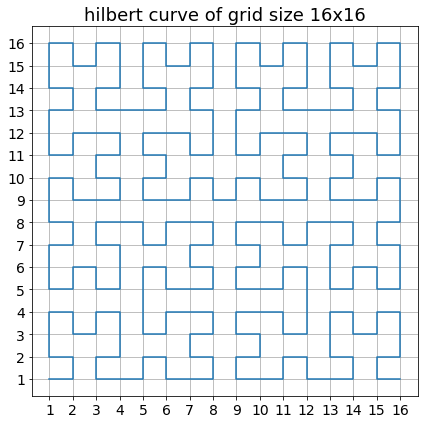

In [57]:
# set figure dir
fig_dir = "figures/hilbert_visualize"
!mkdir -p {fig_dir}

# plot hilbert curve
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

ax.plot(xPoint, yPoint)
ax.set_title(f"hilbert curve of grid size {gridsize}", size=18)
ax.set_xticks(np.arange(1,np.sqrt(nPoint)+1))
ax.set_yticks(np.arange(1,np.sqrt(nPoint)+1))
ax.grid()

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

fig.tight_layout()
fig.savefig(f"{fig_dir}/hilbert_{gridsize}.png")

clear all the exec.

In [58]:
%%bash
module load daint-gpu
module switch PrgEnv-gnu PrgEnv-cray
module load perftools-lite

make clean

rm -f *.out weak.txt caching.txt caching2.txt out.txt 
rm -f -rf *~ *.o *.mod *.MOD *.i core.* *.out *.lst *.x *.x+orig *.x+[0-9]* *.dat *.report report_*.txt out.txt
